# Breadth-first search
Algorithm for finding the shortest path from node A to node B in an unweighted graph or for answering the question whether there is a path from node A to node B.
Below I present an example of a simple unweighted graph, its visualizations and implementations of the row search algorithm. Time takes **O (V + E)**, where V is the number of vertices and E is the number of edges.

In [1]:
graph = {"leon": ["alicja", "bartek", "cecylia"], "bartek": ["janusz", "michal"], "alicja": ["michal"], "cecylia": ["tamara", "jarek"], "janusz": [], "michal": [], "tamara": [], "jarek": []}
print(graph)

{'leon': ['alicja', 'bartek', 'cecylia'], 'bartek': ['janusz', 'michal'], 'alicja': ['michal'], 'cecylia': ['tamara', 'jarek'], 'janusz': [], 'michal': [], 'tamara': [], 'jarek': []}


leon is connected to alicja
leon is connected to bartek
leon is connected to cecylia
bartek is connected to janusz
bartek is connected to michal
alicja is connected to michal
cecylia is connected to tamara
cecylia is connected to jarek


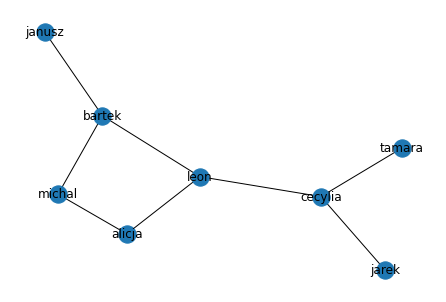

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraph(graph):
    G = nx.Graph()
    for vertex, edges in graph.items():
        G.add_node("%s" % vertex)
        for edge in edges:
            G.add_node("%s" % edge)
            G.add_edge("%s" % vertex, "%s" % edge)
            print(f"{vertex} is connected to {edge}")

    nx.draw(G, with_labels=True)
    plt.show()

visualiseGraph(graph)

{'leon': ['alicja', 'bartek', 'cecylia'], 'bartek': ['janusz', 'michal'], 'alicja': ['michal'], 'cecylia': ['tamara', 'jarek'], 'janusz': [], 'michal': [], 'tamara': [], 'jarek': []}
leon is connected to alicja
leon is connected to bartek
leon is connected to cecylia
bartek is connected to janusz
bartek is connected to michal
alicja is connected to michal
cecylia is connected to tamara
cecylia is connected to jarek
tamara is connected to adam
jarek is connected to adam


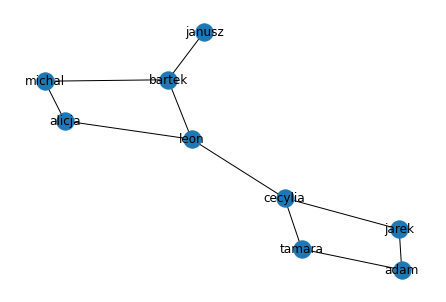

In [3]:
graphWithSomeoneEndsWithM = {"leon": ["alicja", "bartek", "cecylia"], "bartek": ["janusz", "michal"], "alicja": ["michal"], "cecylia": ["tamara", "jarek"], "janusz": [], "michal": [], "tamara": ["adam"], "jarek": ["adam"], "adam": []}
print(graph)
visualiseGraph(graphWithSomeoneEndsWithM)

## Implementation that includes the deque library
The algorithm will answer the question if there is someone on the graph whose name ends with the letter m

In [4]:
from collections import deque

def person_ends_with_m(name): #simple function that's checking if person name ends with letter 'm'
    return name[-1] == 'm'

def is_someone_ends_with_letter_m_in_graph(startsFromName, searchingGraph):
    search_queue = deque()
    search_queue += graph[startsFromName]
    searched = []
    while search_queue:
        person = search_queue.popleft()
        if not person in searched:
            if person_ends_with_m(person):
                print(f"{person}'s name ends with letter m")
                return True
            else:
                search_queue += searchingGraph[person]
                searched.append(person)
    return False


print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graph)} when using graph named graph")
print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graphWithSomeoneEndsWithM)} when using graph named graphWithSomeoneEndsWithM")

Function returned False when using graph named graph
adam's name ends with letter m
Function returned True when using graph named graphWithSomeoneEndsWithM


## Implementation without library deque (less optimal data structure)

In [5]:
def person_ends_with_m(name): #simple function that's checking if person name ends with letter 'm'
    return name[-1] == 'm'

def is_someone_ends_with_letter_m_in_graph(startsFromName, searchingGraph):
    search_queue = []
    search_queue.extend(graph[startsFromName])
    searched = []
    while search_queue:
        person = search_queue[0]
        search_queue.pop(0)
        if not person in searched:
            if person_ends_with_m(person):
                print(f"{person}'s name ends with letter m")
                return True
            else:
                neighbors = searchingGraph[person]
                search_queue.extend(neighbors)
                searched.append(person)
    return False


print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graph)} when using graph named graph")
print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graphWithSomeoneEndsWithM)} when using graph named graphWithSomeoneEndsWithM")

Function returned False when using graph named graph
adam's name ends with letter m
Function returned True when using graph named graphWithSomeoneEndsWithM
